# Data Analysis using Stack Overflow Data - 2023 Survey

## Each stage of the CRISP-DM process. These stages are:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Resultssults

## Business Understanding
In this Notebook, I will explore the 2023 Stack Overflow results to gather some information about the organization, main field of study, important benefits, and the increase in salary with the years of learning how to program.
There are 4 questions I want to find answers to:
1. Question 1: What type of company or organization do you work for?
2. Question 2: What is your main field of study in college or university/for your undergraduate studies in 2023?
3. Question 3: Which is the most important benefits to you?
4. Question 4: The more you learn, will the more salary you get?

## Data Understanding
In order to understanding data. I will do these steps:

- Handle categorical data
- Analyze, Model, and Visualize

In [1]:
!pip install pycodestyle pycodestyle_magic
!pip install flake8
%load_ext pycodestyle_magic

### Gather data

In [96]:
%%pycodestyle
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML
import test1 as t
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Gather Data 
We will start by loading the data

In [97]:
%%pycodestyle 
# Loading Stackoverflow Dataset 2023
df_2023 = pd.read_csv("survey-results-public.csv")

In [98]:
%%pycodestyle
schema = pd.read_csv("survey-results-schema.csv")

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [99]:
%%pycodestyle
# Stackoverflow survey data of 2023
df_2023.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
%%pycodestyle
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [115]:
# Check the number of variables, data types, and observations that have non-null values
df_2023.info()
# There are no null values ​​in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


## **Question 1: What type of company or organization do you work for?**

Text(0.5, 1.0, 'What type of company or organization do you work for?')

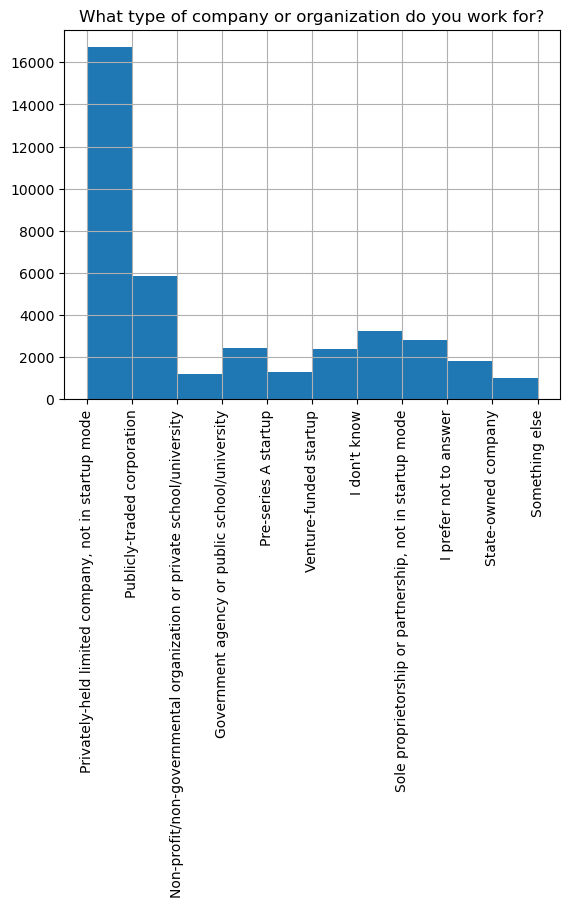

In [100]:
%%pycodestyle
study = df_2023['CompanyType'].hist()
plt.xticks(rotation='vertical')
plt.title('What type of company or organization do you work for?')

#### **Evaluate the Results**
Through the chart, we can easily see:
- The number of people working in Privately-held limited companies, not in startup mode, accounts for the largest number, about more than 16,000 people.
- The number of people working in Publicly-traded corporations accounts for the second largest number, about 6,000 people.
- The number of people working in State-owned companies is small, about less than 1,000 people.
Thus, the difference between the number of people working between a Privately-held limited company and a State-owned company is quite large, about 15,000 people

## ***Question 2: What is your main field of study in college or university/for your undergraduate studies in 2023?***

1. Provide a pandas series of the counts for each industry status
2. The below should be a bar chart of the proportion of individuals if it is set up correctly

Text(0.5, 1.0, ' What is the main MajorUndergrad?')

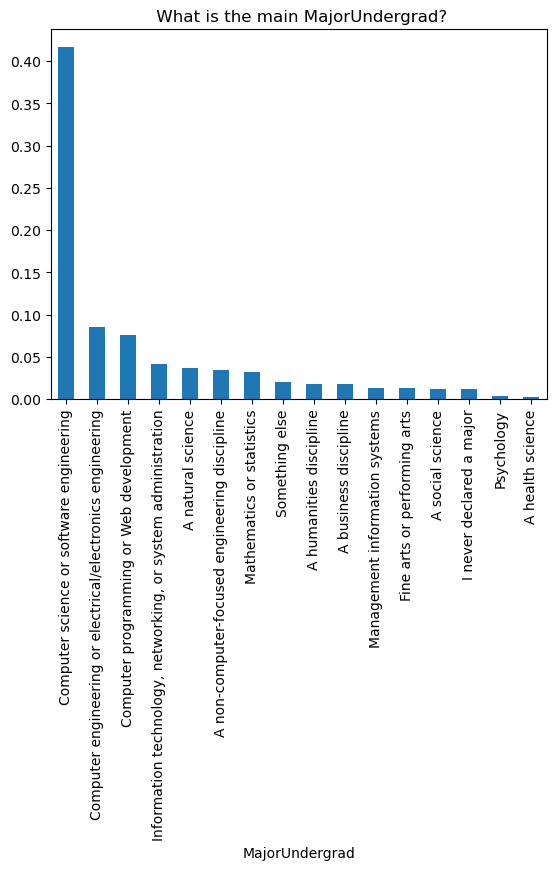

In [101]:
%%pycodestyle 
MajorUndergrad_vals = df_2023.MajorUndergrad.value_counts()  # Provide a pandas 
(MajorUndergrad_vals/df_2023.shape[0]).plot(kind="bar")
plt.title(" What is the main MajorUndergrad?")

#### **Evaluate the Results**
Through the chart, we can easily see:
- The proportion of people graduating from field Computer science or software engineering is the largest, about 43%.
- The rate of people graduating from field Computer engineering or electrical/electronics engineering ranks second, about 9%.
- The rate of people graduating from field A health science is the least, about 1%.
Thus, the proportion of people graduating from field Computer science or software engineering is much larger than field A health science, about 42%. Thereby, we see that field Computer science or software engineering is a field that is very attractive to learnersers.

## ***Question 3: Which is most important benefits to you?***

#### **Data Preparation**

**1.** We will look at the **ImportantBenefits** field. Use the **schema** dataset to answer this question. Write a function called **get_description** that takes the schema dataframe and the column as a string, and returns a string of the description for that column.

get_description:
* INPUT - schema - pandas data frame with the schema of the developer's survey
        column_name - string - the name of the column you would like to know about
* OUTPUT - desc - string - the description of the column

get_description(df_2023.columns[150]) # This should return a string of the first column description

In [103]:
%%pycodestyle
def get_description(column_name, schema=schema):
    ''' INPUT - schema, column_name
    OUTPUT - desc
    '''
    # print(column_name)
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc
get_description(df_2023.columns[150])

'The questions were confusing'

* test your code
* Check your function against the solution - you shouldn't need to change any of the below code

In [104]:
%%pycodestyle
descrips = set(get_description(col) for col in df_2023.columns)
t.check_description(descrips)

Nice job it looks like your function works correctly!


The question we have been focused on has been around how to break into the field. Use your **get_description** function below to take a closer look at the **ImportantBenefits** column.

In [105]:
%%pycodestyle
get_description('ImportantBenefits')

'When it comes to compensation and benefits, other than base salary, which of the following are most important to you?'

**2.** Provide a pandas series of the different **ImportantBenefits** status values in the dataset. Store this pandas series in **ImportantBenefits_vals**. We should see a bar chart of the proportion of individuals in each status. If it looks terrible, and we get no information from it, then we should clean this up!

ImportantBenefits_vals # Provide a pandas series of the counts for each ImportantBenefits status

In [106]:
%%pycodestyle
ImportantBenefits_vals = df_2023.ImportantBenefits.value_counts()
ImportantBenefits_vals   # assure this looks right

ImportantBenefits
None of these                                                                                                    653
Retirement; Vacation/days off; Health benefits; Expected work hours; Remote options                              363
Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options          324
Vacation/days off; Health benefits; Equipment; Expected work hours; Remote options                               305
Vacation/days off; Health benefits; Professional development sponsorship; Expected work hours; Remote options    249
                                                                                                                ... 
Stock options; Education sponsorship; Expected work hours; Child/elder care                                        1
Vacation/days off; Private office; Professional development sponsorship; Meals; Other                              1
Education sponsorship; Child/elder care       

**NOTE:** value_counts # Provide a pandas series of the counts for each industry status

The below should be a bar chart of the proportion of individuals in your ImportantBenefits_vals 

In [107]:
%%pycodestyle
ImportantBenefits_vals = df_2023.ImportantBenefits.value_counts()

Text(0.5, 1.0, 'Which is most important benefits to you?')

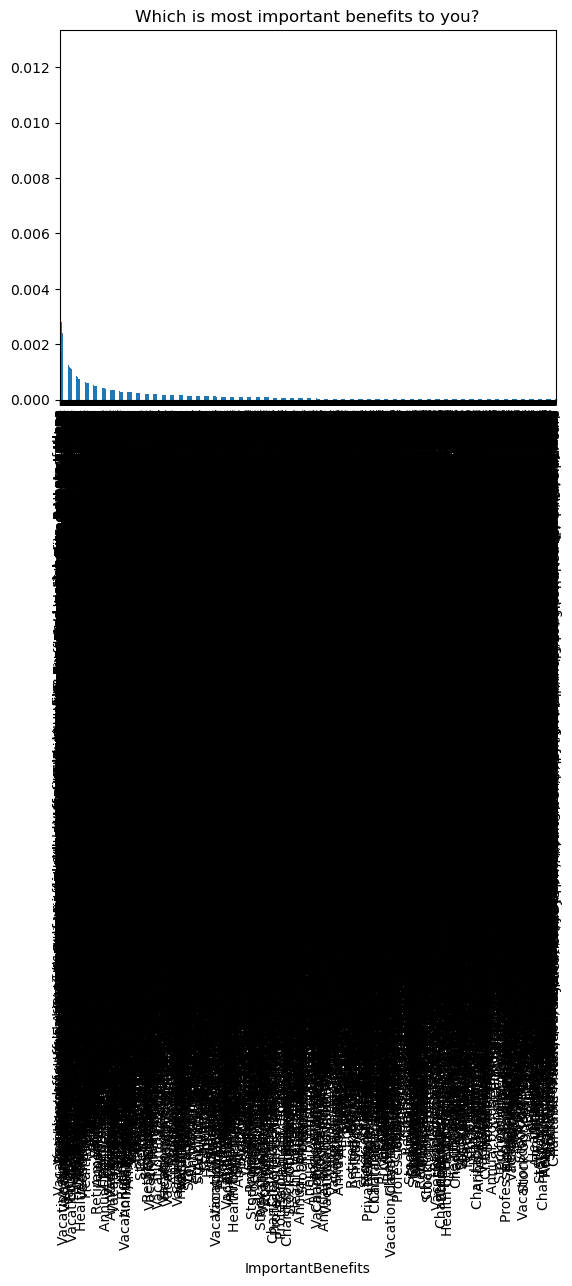

In [83]:
(ImportantBenefits_vals/df_2023.shape[0]).plot(kind="bar");
plt.title("Which is most important benefits to you?")

#### ***Clean data***
We must clean the data. The plot above shows you how it looks like without cleaning.

In [108]:
%%pycodestyle
# Check count
df_2023['ImportantBenefits'].value_counts().reset_index().head()

,ImportantBenefits,count
0,None of these,653
1,Retirement; Vacation/days off; Health benefits...,363
2,Vacation/days off; Equipment; Professional dev...,324
3,Vacation/days off; Health benefits; Equipment;...,305
4,Vacation/days off; Health benefits; Profession...,249


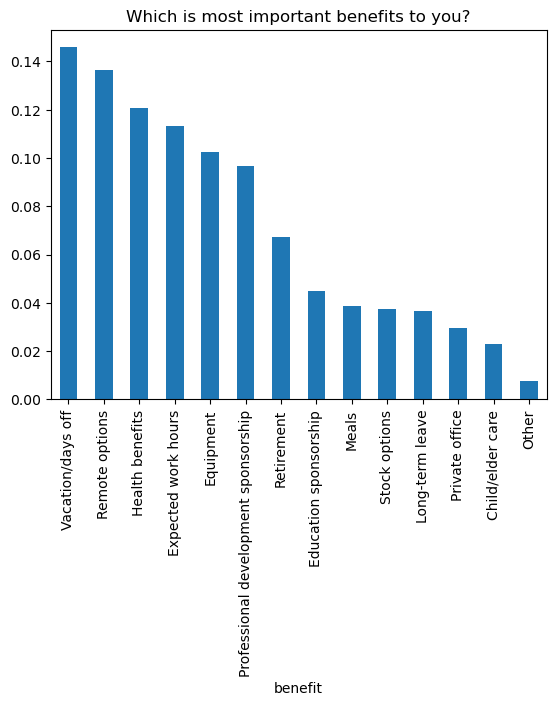

In [114]:
important_benefits_vals = ["Retirement", "Vacation/days off", "Health benefits", "Expected work hours", "Remote options", 
                           "Equipment", "Professional development sponsorship", "Stock options", "Education sponsorship", "Child/elder care",
                           "Private office", "Meals", "Long-term leave", "Other"]

def clean_and_plot(df, title='Which is most important benefits to you?', plot=True):
    '''
    INPUT 
        df - a data frame holding the ImportantBenefits column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        benefit_df - a data frame with the count of how many individuals
        Displays a plot of pretty things related to the ImportantBenefits column.
    '''
    benefit = df['ImportantBenefits'].value_counts().reset_index()
    benefit.rename(columns={'ImportantBenefits': 'benefit'}, inplace=True)
    benefit_df = t.total_count(benefit, 'benefit', 'count', important_benefits_vals)

    benefit_df.set_index('benefit', inplace=True)
    if plot:
        (benefit_df/benefit_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_benefit_df = benefit_df/benefit_df.sum()
    return props_benefit_df
    
props_df = clean_and_plot(df_2023)

#### **Evaluate the Results**
Based on the chart, we see:
- The benefit users are most interested in is Vacation/days off, accounting for about 15%.
- Remote options is the second most important benefit, accounting for about 13.7%.
- Child/elder care and Other are benefits that receive little attention, accounting for about 2% and 1% respectively.
Lastly, when it comes to compensation and benefits, other than base salary, Vacation/days off is the following are most important to users

## ***Question 4: The more you learn, will the more salary you get?***

In [110]:
%%pycodestyle
# Use group by function to group the YearsProgram with the average of Salary
study_df = df_2023.groupby(by='YearsProgram').agg({'Salary': 'mean'})
study_df.head()

,Salary
YearsProgram,
1 to 2 years,33952.955892
10 to 11 years,48056.752718
11 to 12 years,54866.916054
12 to 13 years,55753.347727
13 to 14 years,57149.324679


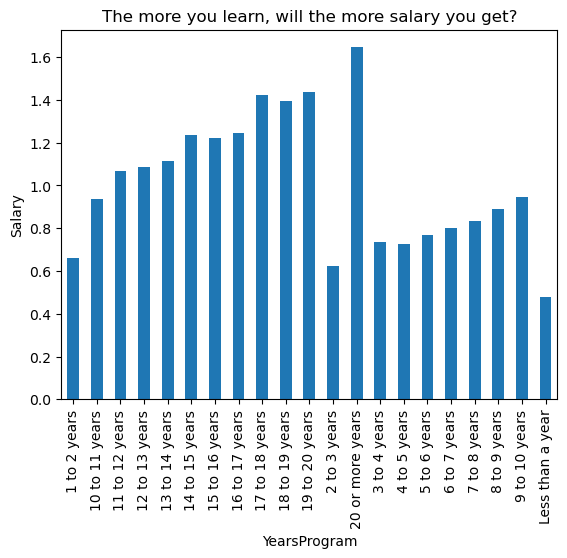

In [111]:
%%pycodestyle
(study_df/df_2023.shape[0]).plot(kind='bar', legend=None)
plt.title('The more you learn, will the more salary you get?')
plt.ylabel('Salary')
plt.show()

#### **Evaluate the Results**
Based on the map, we can see:
- We can achieve the highest salary when we have 20 years or more of study experience.
- From 19 to 20 years of study, we can reach the 2nd highest average salary.
- The average salary is lowest when we have less than 1 year of study experience.
From there we conclude that the more years of experience accumulated working on a project, the higher the average salary and vice versa.